In [19]:
import numpy as np
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift,interpolation
from scipy import signal
from astropy.io import fits

img1=fits.open('r_0036-S001-R001-C001-I_36283.fts')
img2=fits.open('r_0036-S001-R001-C003-I_36283.fts')

ref_img = img1[0].data
tar_img = img2[0].data

shift, error, diffphase = register_translation(ref_img, tar_img,10)
print("Detected subpixel offset (y, x):")
print(shift)

Detected subpixel offset (y, x):
[ 0.8 -1.8]


In [20]:
len(shift)

2

In [21]:
offset_image = fourier_shift(np.fft.fftn(tar_img), shift)
offset_image = np.fft.ifftn(offset_image)

In [31]:
off_img = interpolation.shift(tar_img, shift, order=1)

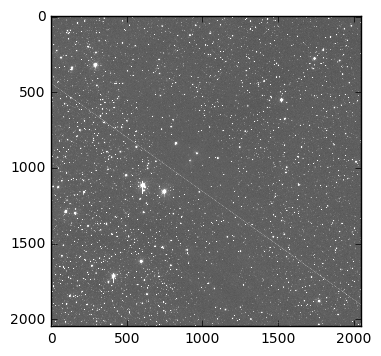

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(off_img,cmap='gray',vmin=500,vmax=2500)

In [34]:
result = fits.PrimaryHDU(data=off_img,header=img2[0].header)
result.writeto('shift_img3-13.fits')

In [35]:
stacks = (ref_img + off_img) /2.

In [36]:
ss = fits.PrimaryHDU(data=stacks,header=img1[0].header)
ss.writeto('stack-1.fits')